In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from string import ascii_letters

In [2]:
norm_df = pd.read_csv('NormDF', index_col=0)
norm_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C3',C5',P(mid),C6',T4',T3',T5',S1',S2',S3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,-0.046771,-0.044253,-0.047690,-0.011825,-0.012687,0.136364,0.000373,...,0.470674,-0.007648,-0.046532,0.058284,2.319193,-4.777428,-1.344321,26.301985,4.233464,8.525938
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,-0.071161,-0.040549,-0.052452,-0.015810,0.053274,-0.863636,-0.000713,...,-0.529326,0.074404,-0.046532,-0.052827,1.013598,1.011810,0.232908,0.045382,0.716494,0.584531
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,-0.083356,-0.010920,-0.014357,-0.016285,-0.028094,0.136364,-0.000631,...,-0.529326,-0.012624,-0.012634,-0.052827,0.961331,0.984255,0.225504,0.156420,0.616749,0.647162
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,-0.028478,0.003895,0.004691,-0.011376,0.029201,0.136364,-0.000560,...,-0.529326,-0.013322,0.004315,-0.052827,1.304008,0.948006,0.180516,-0.407732,0.720790,0.442089
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,0.087376,0.040932,0.052310,0.026762,-0.032908,0.136364,-0.000349,...,0.470674,-0.009035,0.046688,-0.002827,0.598923,0.959197,0.094104,-0.107594,0.740994,0.614735


In [3]:
#Calculate correlation with .corr(): 
print(norm_df.corr())

           P(IPO)      P(H)      P(L)   P(1Day)        C1        C2        C3  \
P(IPO)   1.000000  0.867953  0.888556  0.038929  0.016603  0.218751  0.015709   
P(H)     0.867953  1.000000  0.990618  0.038671 -0.013412  0.188453  0.001585   
P(L)     0.888556  0.990618  1.000000  0.042100 -0.007560  0.205707  0.002475   
P(1Day)  0.038929  0.038671  0.042100  1.000000 -0.023288  0.034825 -0.131636   
C1       0.016603 -0.013412 -0.007560 -0.023288  1.000000 -0.017937  0.001916   
C2       0.218751  0.188453  0.205707  0.034825 -0.017937  1.000000  0.007315   
C3       0.015709  0.001585  0.002475 -0.131636  0.001916  0.007315  1.000000   
C4      -0.049557 -0.091464 -0.094337 -0.056249  0.034674 -0.050363  0.002999   
C5       0.376640  0.337514  0.348534 -0.007910  0.007371  0.128547 -0.000830   
C6       0.364109  0.317631  0.334299 -0.010152  0.008988  0.123738  0.010819   
C7       0.230273  0.218296  0.232358 -0.016819  0.030425  0.094346  0.006326   
T1       0.208112  0.185541 

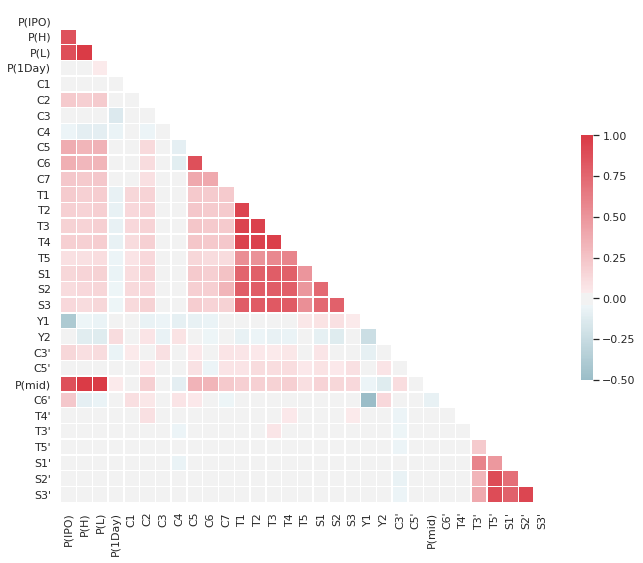

In [4]:
# Compute the correlation matrix
corr = norm_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-.5, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Cannot figure out how to get the scale from 1 to -1????

In [6]:
#Sort out the top correlation values
def correl(norm_df):
    cor = norm_df.corr()
    corrm = np.corrcoef(norm_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]
    ## Thresh hold above 0.5 for highly correlated results        
    thresh = 0.5
    display(high_cor[high_cor>thresh])
correl(corr)

max corr: 0.9998963199773814 , min corr:  -0.7860770361271641


P(mid)  P(H)      0.999896
        P(L)      0.999866
P(L)    P(H)      0.999526
T4      T3        0.998699
T3      T2        0.998391
T4      T2        0.998381
T1      T4        0.998307
        T2        0.998190
        T3        0.997897
S2'     S3'       0.997132
T5'     S2'       0.986301
C5      C6        0.985985
T3      S3        0.985716
T2      S3        0.984946
T4      S3        0.984734
T1      S3        0.983032
S1      T3        0.980759
        T2        0.980250
        T4        0.980192
S2      T3        0.980012
        T1        0.979149
        S3        0.978878
        T2        0.978558
T5'     S3'       0.978433
S1      T1        0.978363
S2      T4        0.977929
S1      S2        0.976692
        S3        0.975871
P(IPO)  P(L)      0.955828
P(mid)  P(IPO)    0.952841
P(IPO)  P(H)      0.950007
S1'     S3'       0.940877
        S2'       0.922077
T4      T5        0.897267
T3      T5        0.892094
T5      S3        0.890477
        T1        0.883501
S